In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
dataset = pd.read_csv('../data/raw/phone_addiction_dataset_1.csv')

In [3]:
print(f"Dataset shape: {dataset.shape}")
print("\nFirst few rows:")
dataset.head()
print("\nDataset info:")
dataset.info()
print("\nStatistical summary:")
dataset.describe()

Dataset shape: (6000, 21)

First few rows:

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              6000 non-null   int64  
 1   Age                     6000 non-null   int64  
 2   Gender                  6000 non-null   object 
 3   Daily_Usage_Hours       6000 non-null   float64
 4   Sleep_Hours             6000 non-null   float64
 5   Academic_Performance    6000 non-null   int64  
 6   Social_Interactions     6000 non-null   int64  
 7   Exercise_Hours          6000 non-null   float64
 8   Anxiety_Level           6000 non-null   int64  
 9   Depression_Level        6000 non-null   int64  
 10  Self_Esteem             6000 non-null   int64  
 11  Screen_Time_Before_Bed  6000 non-null   float64
 12  Phone_Checks_Per_Day    6000 non-null   int64  
 13  Apps_Used_Daily         6000 non-nu

,Unnamed: 0,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2999.500000,33.658667,5.020667,6.489767,74.947333,5.097667,1.040667,5.590000,5.460333,5.546333,1.006733,83.093000,12.609333,2.499233,1.525267,1.016333,5.459667,6.015100,8.881900
std,1732.195139,26.891517,1.956338,1.490589,14.682932,3.139072,0.734558,2.890437,2.871318,2.860516,0.492837,37.743897,4.611101,0.988119,0.932623,0.648287,2.864334,2.014608,1.609464
min,0.000000,2.000000,0.000000,3.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,1499.750000,15.000000,3.700000,5.500000,62.000000,2.000000,0.500000,3.000000,3.000000,3.000000,0.700000,51.000000,9.000000,1.800000,0.800000,0.500000,3.000000,4.700000,8.000000
50%,2999.500000,18.000000,5.000000,6.500000,75.000000,5.000000,1.000000,6.000000,5.000000,6.000000,1.000000,82.000000,13.000000,2.500000,1.500000,1.000000,5.000000,6.000000,10.000000
75%,4499.250000,52.000000,6.400000,7.500000,88.000000,8.000000,1.500000,8.000000,8.000000,8.000000,1.400000,115.250000,17.000000,3.200000,2.200000,1.500000,8.000000,7.400000,10.000000
max,5999.000000,100.000000,11.500000,10.000000,100.000000,10.000000,4.000000,10.000000,10.000000,10.000000,2.600000,150.000000,20.000000,5.000000,4.000000,3.000000,10.000000,14.000000,10.000000


In [4]:
# Check for missing values
print("Missing values per column:")
print(dataset.isnull().sum())
print(f"\nTotal missing values: {dataset.isnull().sum().sum()}")

Missing values per column:
Unnamed: 0                0
Age                       0
Gender                    0
Daily_Usage_Hours         0
Sleep_Hours               0
Academic_Performance      0
Social_Interactions       0
Exercise_Hours            0
Anxiety_Level             0
Depression_Level          0
Self_Esteem               0
Screen_Time_Before_Bed    0
Phone_Checks_Per_Day      0
Apps_Used_Daily           0
Time_on_Social_Media      0
Time_on_Gaming            0
Time_on_Education         0
Phone_Usage_Purpose       0
Family_Communication      0
Weekend_Usage_Hours       0
Addiction_Level           0
dtype: int64

Total missing values: 0


In [5]:
# Remove the index column if it exists
if 'Unnamed: 0' in dataset.columns:
    dataset = dataset.drop(columns=['Unnamed: 0'])

# Display target variable distribution
print("Target Variable (Addiction_Level) Distribution:")
print(dataset['Addiction_Level'].value_counts().sort_index())
print(f"\nTarget variable statistics:")
print(dataset['Addiction_Level'].describe())

Target Variable (Addiction_Level) Distribution:
Addiction_Level
1.0        2
1.4        4
2.0        2
2.1        4
2.2        2
        ... 
9.6       92
9.7       74
9.8       56
9.9      100
10.0    3048
Name: count, Length: 80, dtype: int64

Target variable statistics:
count    6000.000000
mean        8.881900
std         1.609464
min         1.000000
25%         8.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: Addiction_Level, dtype: float64


In [6]:
# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

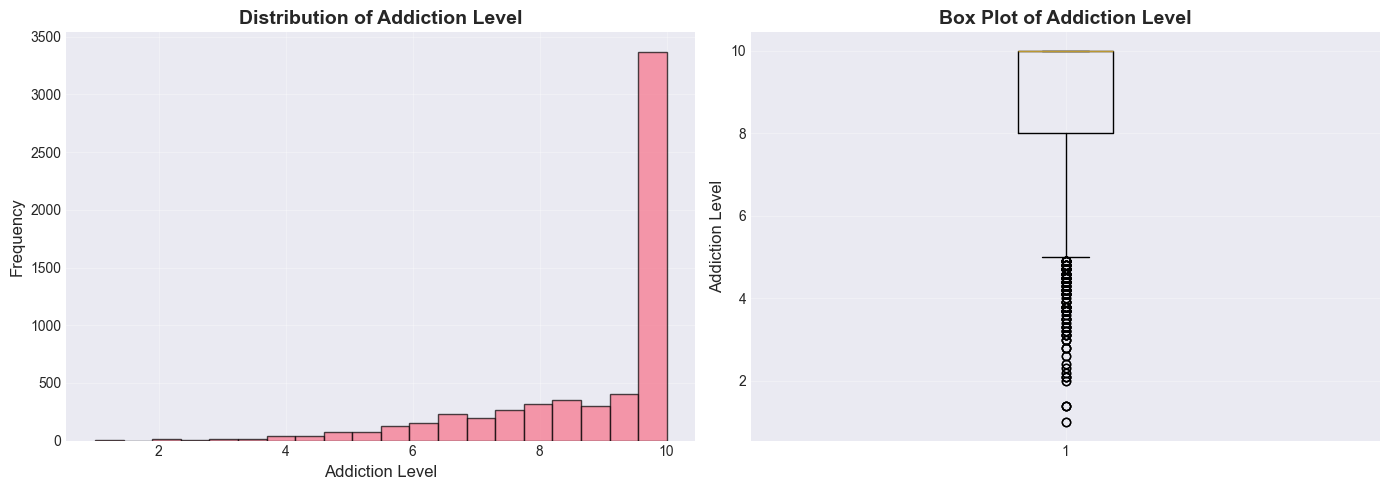

In [7]:
# 1. Target Variable Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(dataset['Addiction_Level'], bins=20, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Addiction Level', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Addiction Level', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(dataset['Addiction_Level'], vert=True)
axes[1].set_ylabel('Addiction Level', fontsize=12)
axes[1].set_title('Box Plot of Addiction Level', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

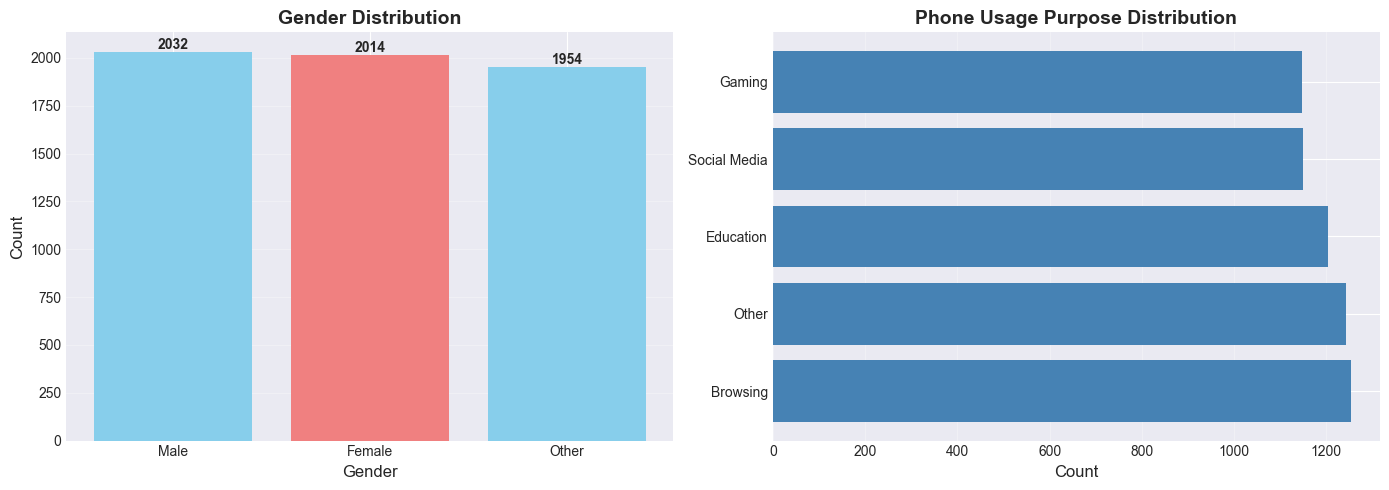

In [8]:
# 2. Categorical Features Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gender distribution
gender_counts = dataset['Gender'].value_counts()
axes[0].bar(gender_counts.index, gender_counts.values, color=['skyblue', 'lightcoral'])
axes[0].set_xlabel('Gender', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Gender Distribution', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(gender_counts.values):
    axes[0].text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

# Phone Usage Purpose distribution
purpose_counts = dataset['Phone_Usage_Purpose'].value_counts()
axes[1].barh(range(len(purpose_counts)), purpose_counts.values, color='steelblue')
axes[1].set_yticks(range(len(purpose_counts)))
axes[1].set_yticklabels(purpose_counts.index)
axes[1].set_xlabel('Count', fontsize=12)
axes[1].set_title('Phone Usage Purpose Distribution', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


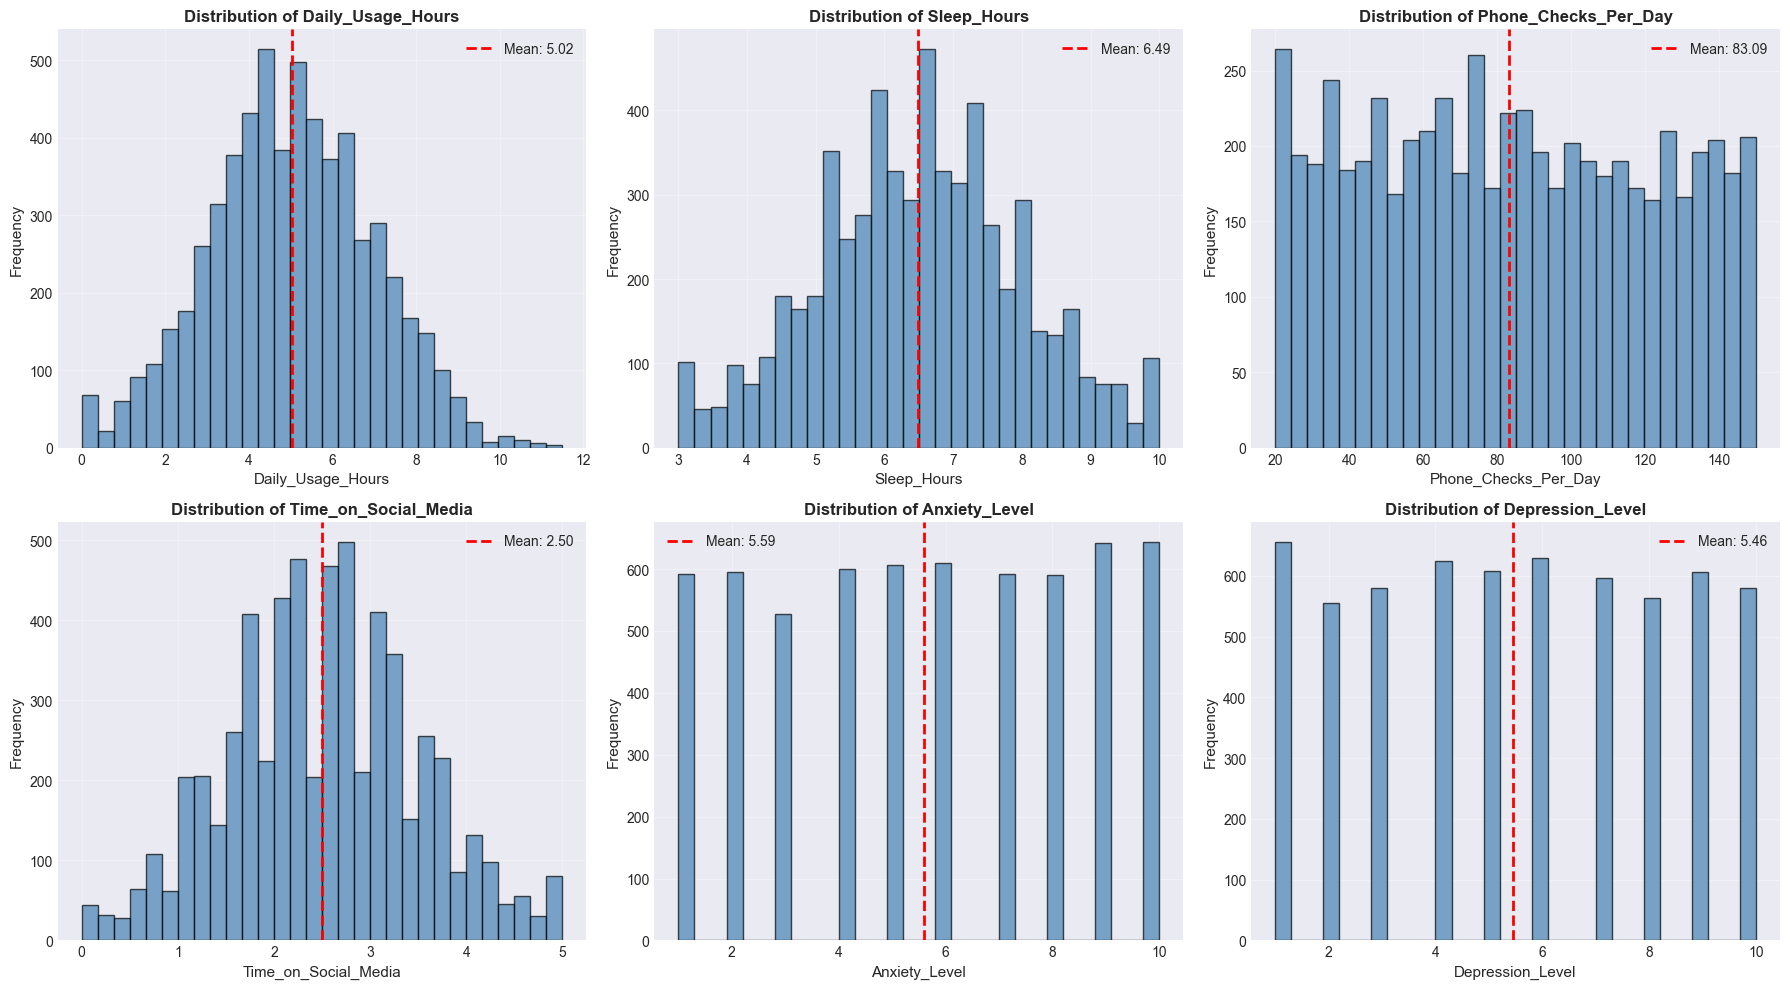

In [9]:
# 3. Key Numerical Features Distribution
key_features = ['Daily_Usage_Hours', 'Sleep_Hours', 'Phone_Checks_Per_Day', 
                'Time_on_Social_Media', 'Anxiety_Level', 'Depression_Level']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    axes[i].hist(dataset[feature], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[i].set_xlabel(feature, fontsize=11)
    axes[i].set_ylabel('Frequency', fontsize=11)
    axes[i].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    # Add mean line
    mean_val = dataset[feature].mean()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()


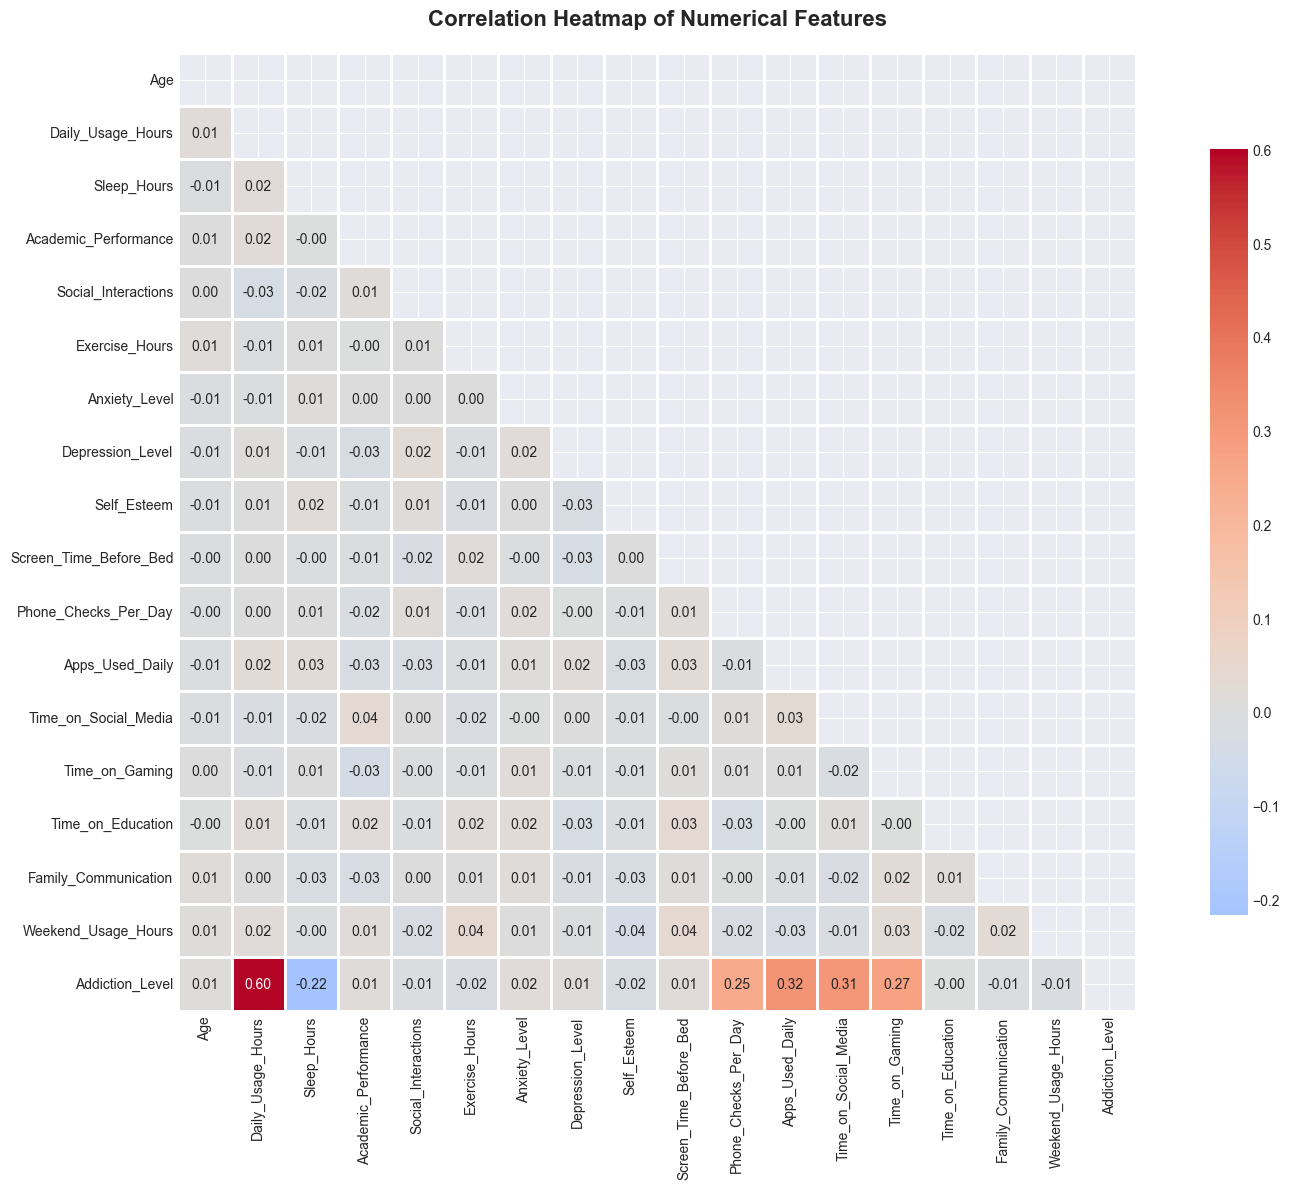

In [10]:
# 4. Correlation Heatmap
numeric_cols = dataset.select_dtypes(include=[np.number]).columns
correlation_matrix = dataset[numeric_cols].corr()

plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


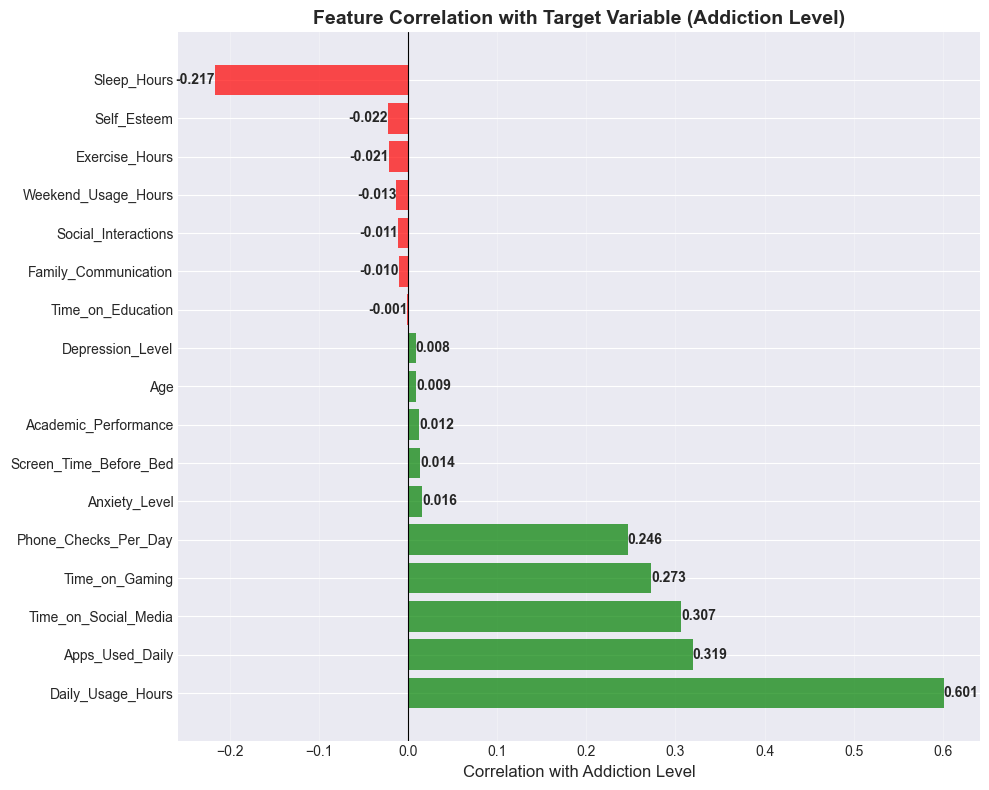

In [11]:
# 5. Correlation with Target Variable
target_corr = dataset[numeric_cols].corr()['Addiction_Level'].sort_values(ascending=False)
target_corr = target_corr.drop('Addiction_Level')  # Remove self-correlation

plt.figure(figsize=(10, 8))
colors = ['red' if x < 0 else 'green' for x in target_corr.values]
bars = plt.barh(range(len(target_corr)), target_corr.values, color=colors, alpha=0.7)
plt.yticks(range(len(target_corr)), target_corr.index)
plt.xlabel('Correlation with Addiction Level', fontsize=12)
plt.title('Feature Correlation with Target Variable (Addiction Level)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (idx, val) in enumerate(target_corr.items()):
    plt.text(val, i, f'{val:.3f}', va='center', ha='right' if val < 0 else 'left', fontweight='bold')

plt.tight_layout()
plt.show()


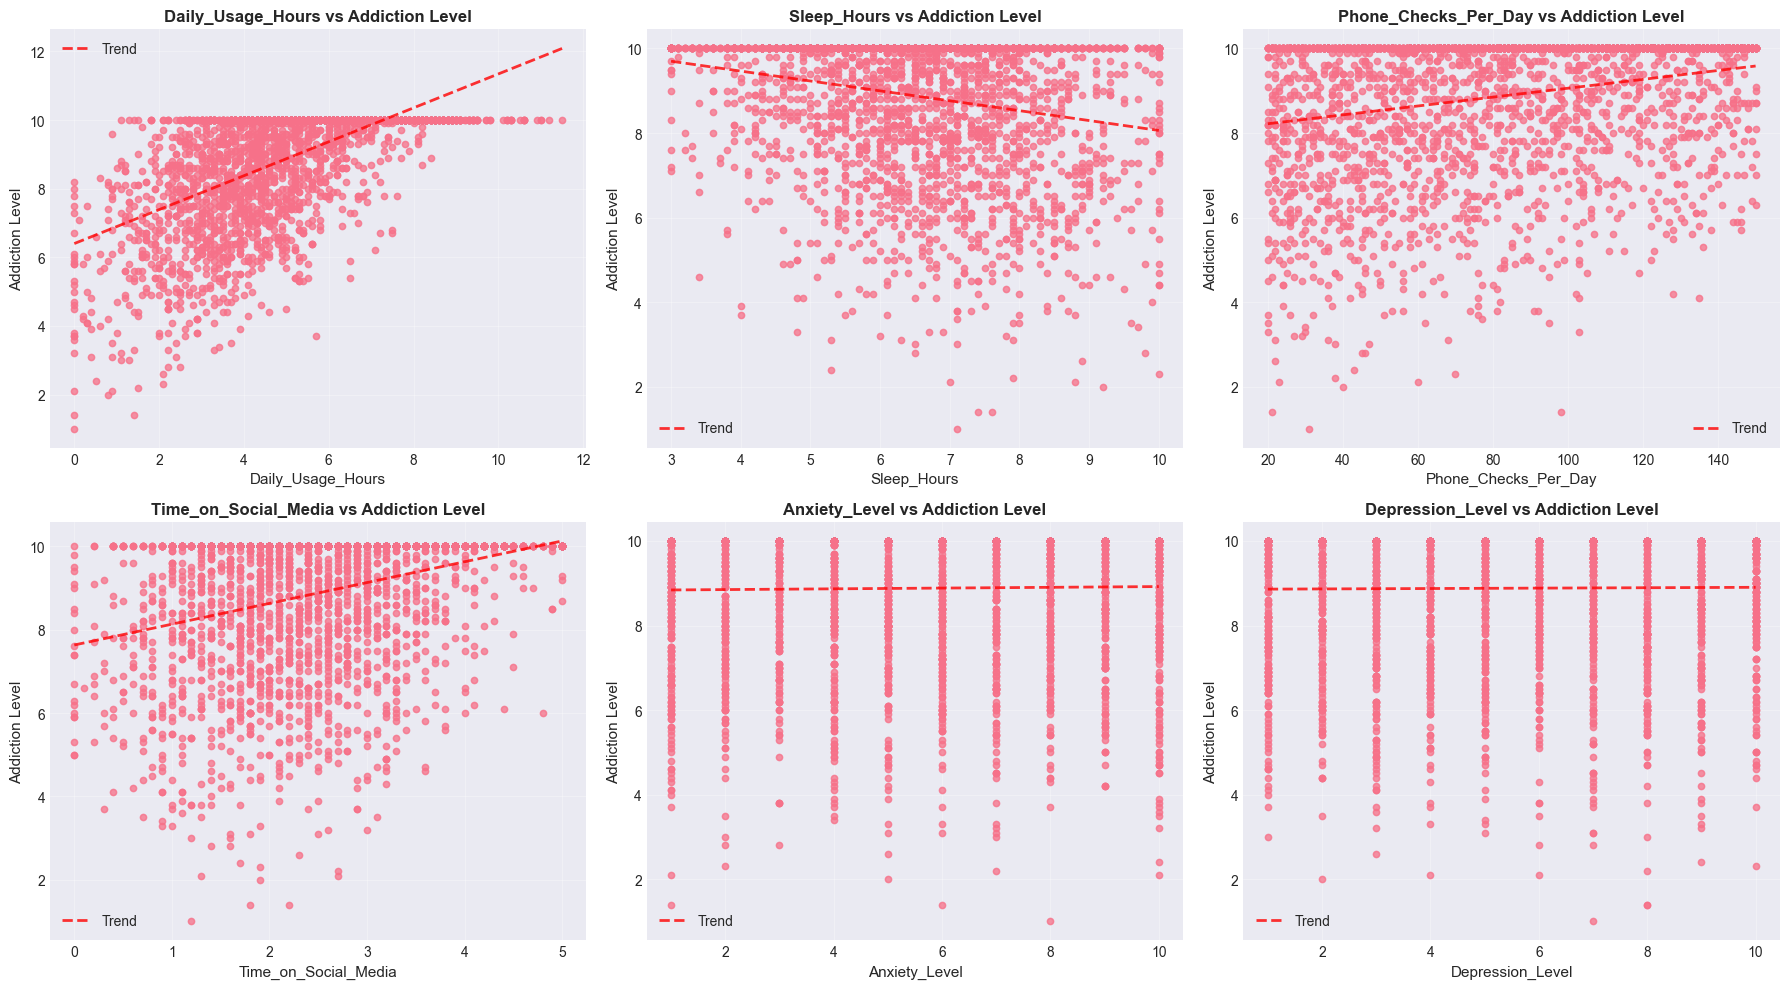

In [12]:
# 6. Relationship between Key Features and Addiction Level
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

key_features_vs_target = ['Daily_Usage_Hours', 'Sleep_Hours', 'Phone_Checks_Per_Day',
                          'Time_on_Social_Media', 'Anxiety_Level', 'Depression_Level']

for i, feature in enumerate(key_features_vs_target):
    axes[i].scatter(dataset[feature], dataset['Addiction_Level'], alpha=0.5, s=20)
    axes[i].set_xlabel(feature, fontsize=11)
    axes[i].set_ylabel('Addiction Level', fontsize=11)
    axes[i].set_title(f'{feature} vs Addiction Level', fontsize=12, fontweight='bold')
    axes[i].grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(dataset[feature], dataset['Addiction_Level'], 1)
    p = np.poly1d(z)
    axes[i].plot(dataset[feature].sort_values(), p(dataset[feature].sort_values()), 
                "r--", alpha=0.8, linewidth=2, label='Trend')
    axes[i].legend()

plt.tight_layout()
plt.show()


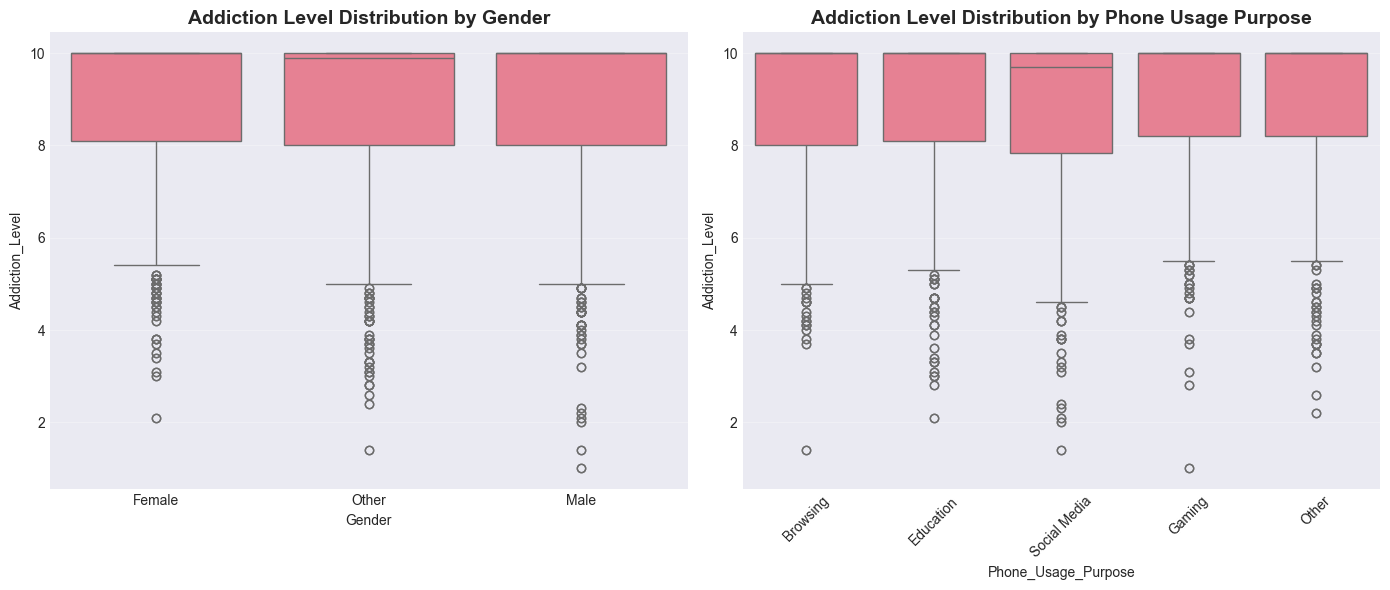

In [13]:
# 7. Box Plots: Addiction Level by Categorical Features
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Addiction Level by Gender
sns.boxplot(data=dataset, x='Gender', y='Addiction_Level', ax=axes[0])
axes[0].set_title('Addiction Level Distribution by Gender', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Addiction Level by Phone Usage Purpose
sns.boxplot(data=dataset, x='Phone_Usage_Purpose', y='Addiction_Level', ax=axes[1])
axes[1].set_title('Addiction Level Distribution by Phone Usage Purpose', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


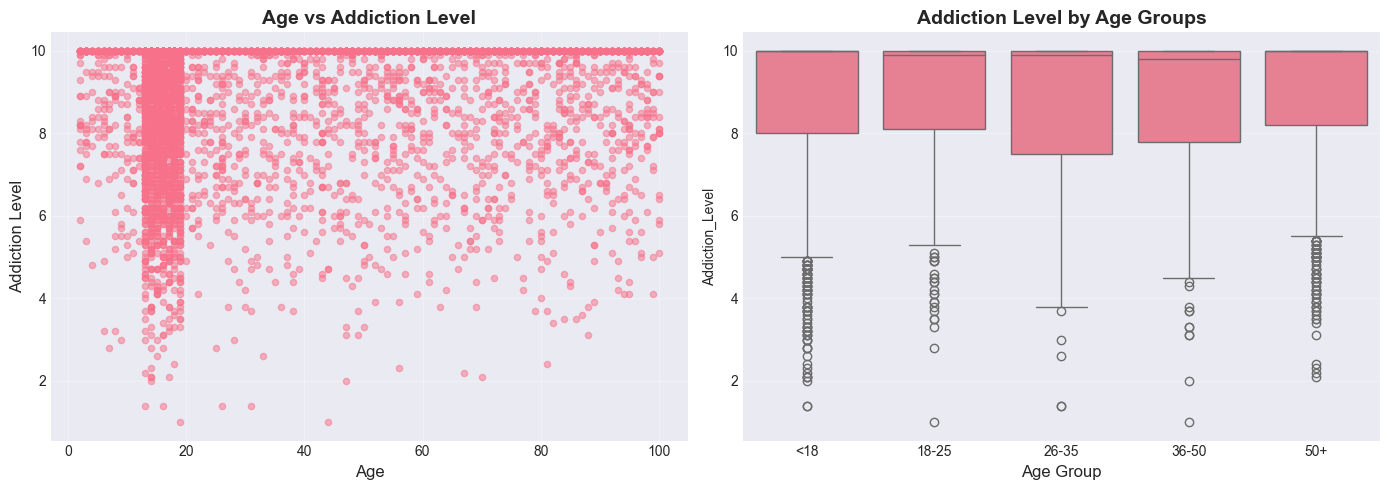

In [14]:
# 8. Age vs Addiction Level Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
axes[0].scatter(dataset['Age'], dataset['Addiction_Level'], alpha=0.5, s=20)
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Addiction Level', fontsize=12)
axes[0].set_title('Age vs Addiction Level', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Box plot by age groups
dataset['Age_Group'] = pd.cut(dataset['Age'], bins=[0, 18, 25, 35, 50, 100], 
                              labels=['<18', '18-25', '26-35', '36-50', '50+'])
sns.boxplot(data=dataset, x='Age_Group', y='Addiction_Level', ax=axes[1])
axes[1].set_title('Addiction Level by Age Groups', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Age Group', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


/var/folders/_j/6bfjh4fs4fdbw9rrz43g83y00000gn/T/ipykernel_78910/3483200163.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dataset.groupby(f'{feature}_Group')['Addiction_Level'].mean()
/var/folders/_j/6bfjh4fs4fdbw9rrz43g83y00000gn/T/ipykernel_78910/3483200163.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dataset.groupby(f'{feature}_Group')['Addiction_Level'].mean()
/var/folders/_j/6bfjh4fs4fdbw9rrz43g83y00000gn/T/ipykernel_78910/3483200163.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fa

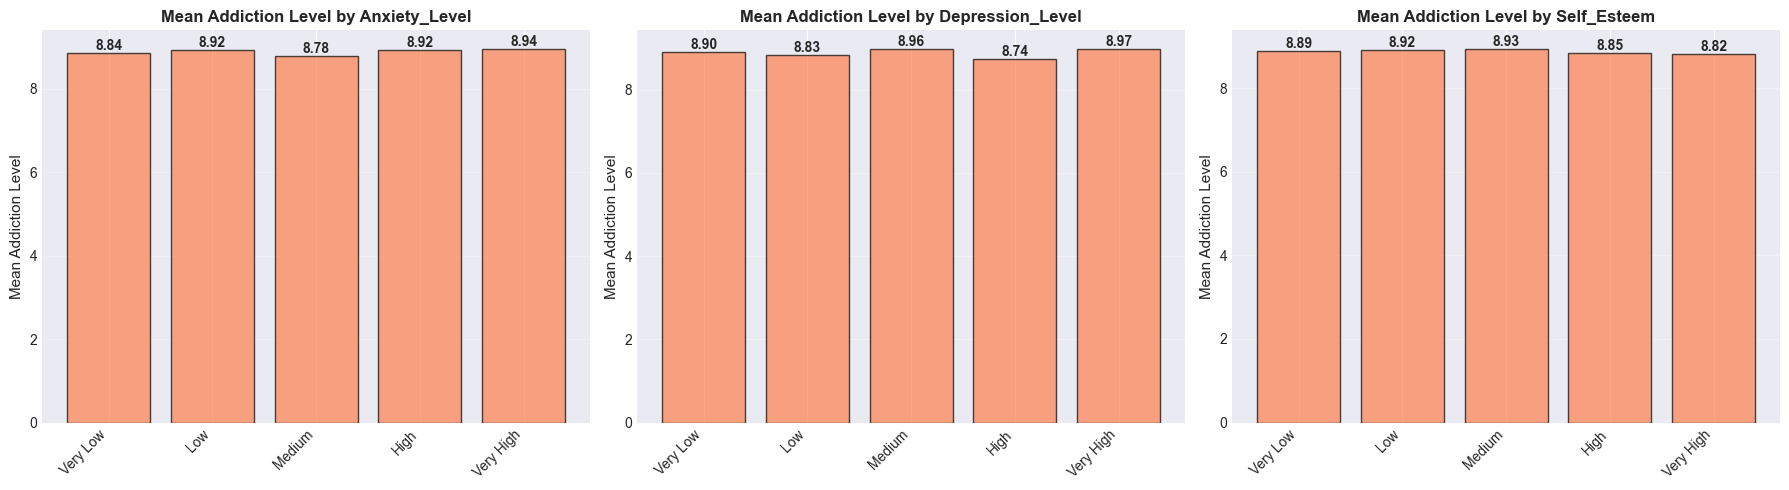

In [15]:
# 9. Mental Health Indicators vs Addiction Level
mental_health_features = ['Anxiety_Level', 'Depression_Level', 'Self_Esteem']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, feature in enumerate(mental_health_features):
    # Create bins for better visualization
    dataset[f'{feature}_Group'] = pd.cut(dataset[feature], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
    grouped = dataset.groupby(f'{feature}_Group')['Addiction_Level'].mean()
    
    axes[i].bar(range(len(grouped)), grouped.values, color='coral', alpha=0.7, edgecolor='black')
    axes[i].set_xticks(range(len(grouped)))
    axes[i].set_xticklabels(grouped.index, rotation=45, ha='right')
    axes[i].set_ylabel('Mean Addiction Level', fontsize=11)
    axes[i].set_title(f'Mean Addiction Level by {feature}', fontsize=12, fontweight='bold')
    axes[i].grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for j, v in enumerate(grouped.values):
        axes[i].text(j, v, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


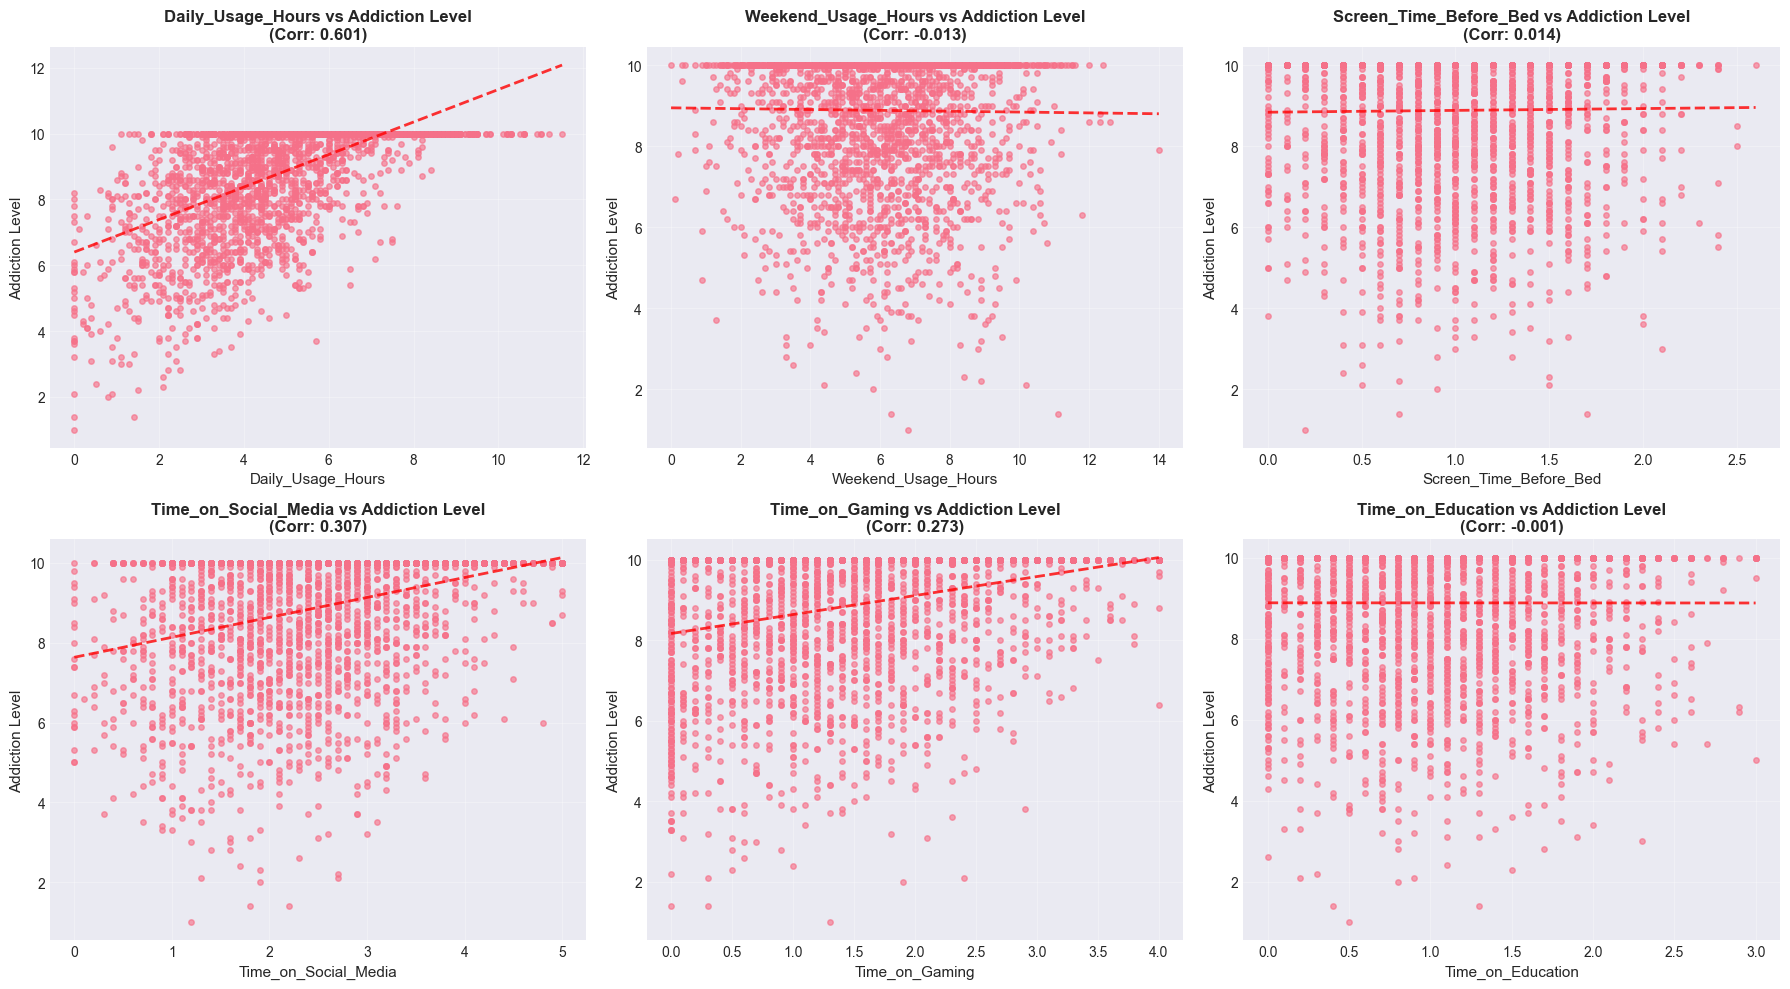

In [16]:
# 10. Usage Patterns Analysis
usage_features = ['Daily_Usage_Hours', 'Weekend_Usage_Hours', 'Screen_Time_Before_Bed',
                  'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(usage_features):
    # Create correlation scatter with trend
    axes[i].scatter(dataset[feature], dataset['Addiction_Level'], alpha=0.4, s=15)
    
    # Calculate and display correlation
    corr = dataset[feature].corr(dataset['Addiction_Level'])
    
    # Add trend line
    z = np.polyfit(dataset[feature], dataset['Addiction_Level'], 1)
    p = np.poly1d(z)
    sorted_feature = dataset[feature].sort_values()
    axes[i].plot(sorted_feature, p(sorted_feature), "r--", alpha=0.8, linewidth=2)
    
    axes[i].set_xlabel(feature, fontsize=11)
    axes[i].set_ylabel('Addiction Level', fontsize=11)
    axes[i].set_title(f'{feature} vs Addiction Level\n(Corr: {corr:.3f})', 
                     fontsize=12, fontweight='bold')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


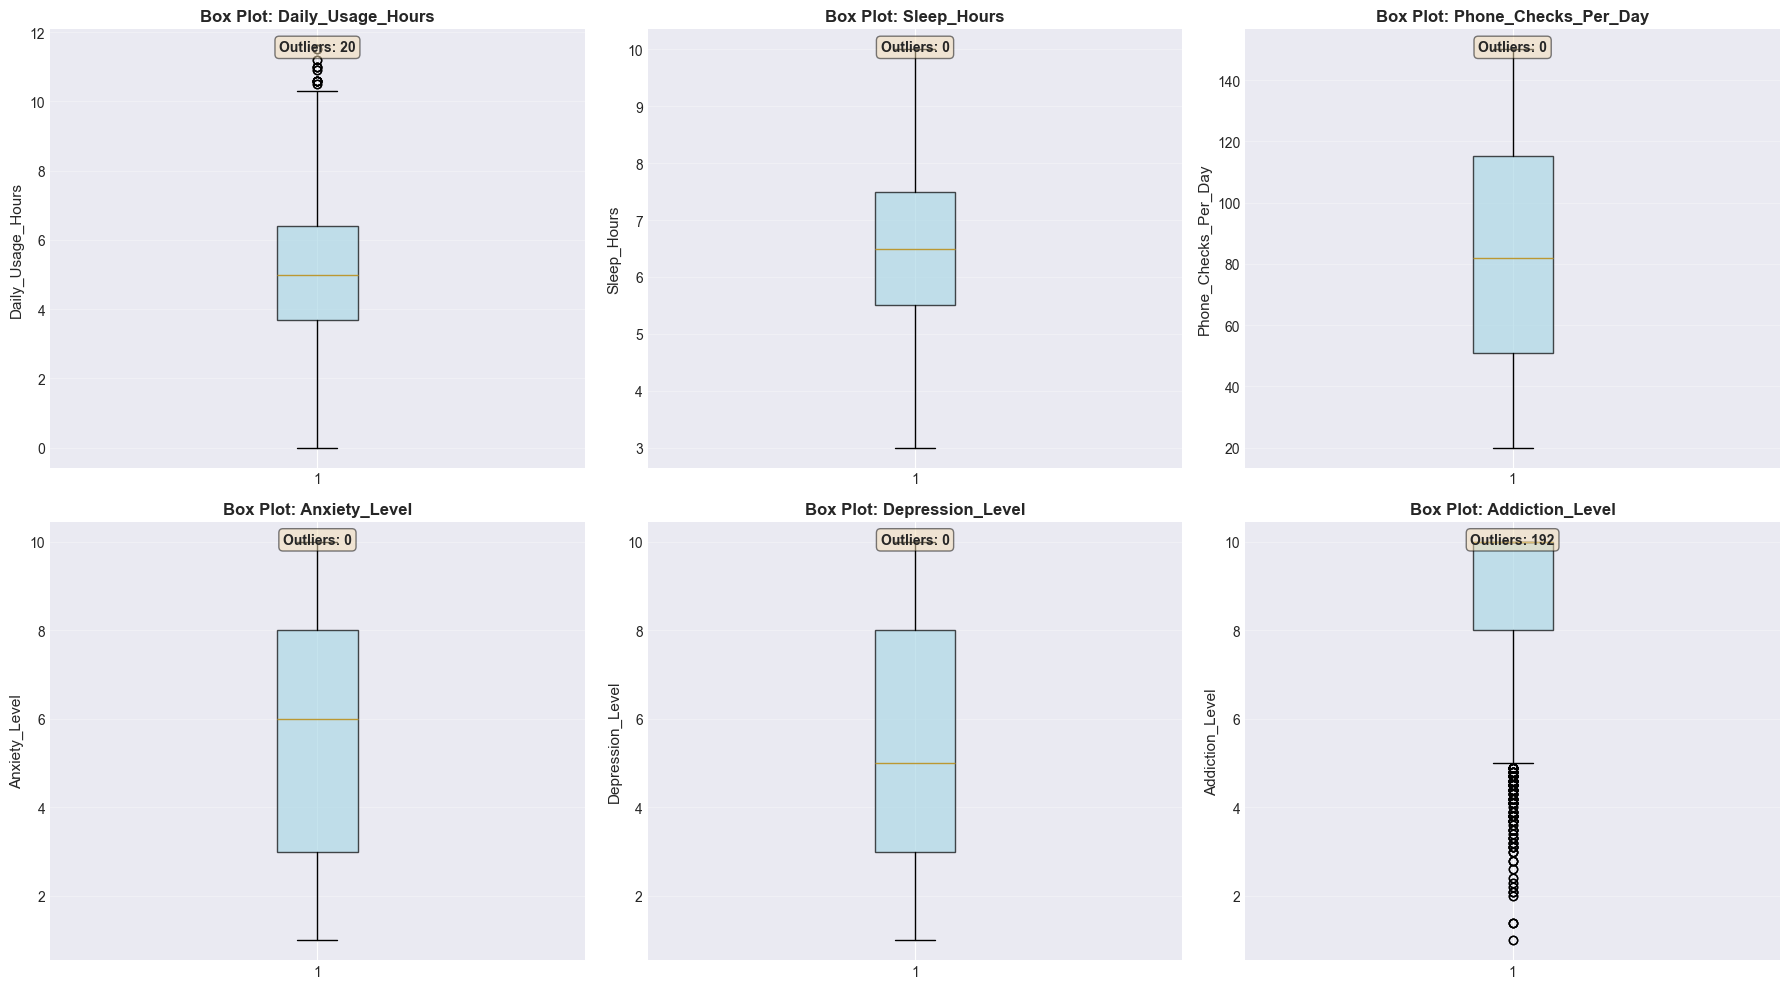

In [17]:
# 11. Outlier Detection using Box Plots for Key Features
key_numeric_features = ['Daily_Usage_Hours', 'Sleep_Hours', 'Phone_Checks_Per_Day',
                       'Anxiety_Level', 'Depression_Level', 'Addiction_Level']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, feature in enumerate(key_numeric_features):
    axes[i].boxplot(dataset[feature], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightblue', alpha=0.7))
    axes[i].set_ylabel(feature, fontsize=11)
    axes[i].set_title(f'Box Plot: {feature}', fontsize=12, fontweight='bold')
    axes[i].grid(True, alpha=0.3, axis='y')
    
    # Add statistics
    q1 = dataset[feature].quantile(0.25)
    q3 = dataset[feature].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = dataset[(dataset[feature] < lower_bound) | (dataset[feature] > upper_bound)]
    axes[i].text(0.5, 0.95, f'Outliers: {len(outliers)}', 
                transform=axes[i].transAxes, ha='center', 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


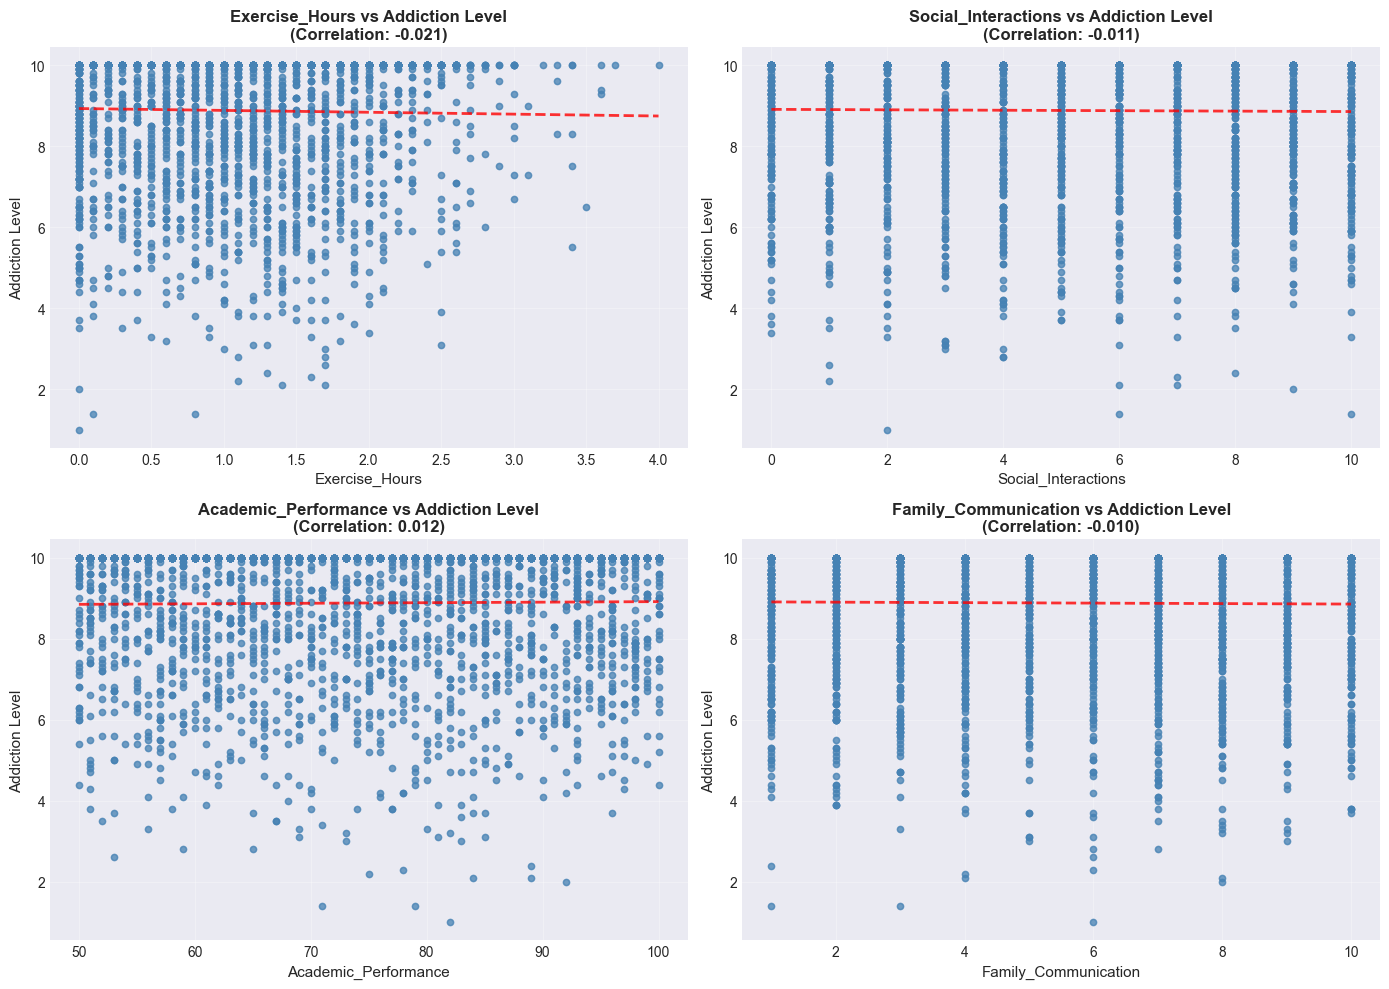

In [18]:
# 12. Lifestyle Factors vs Addiction Level
lifestyle_features = ['Exercise_Hours', 'Social_Interactions', 'Academic_Performance', 
                     'Family_Communication']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, feature in enumerate(lifestyle_features):
    # Create scatter plot with trend line
    axes[i].scatter(dataset[feature], dataset['Addiction_Level'], alpha=0.5, s=20, color='steelblue')
    
    # Calculate correlation
    corr = dataset[feature].corr(dataset['Addiction_Level'])
    
    # Add trend line
    z = np.polyfit(dataset[feature], dataset['Addiction_Level'], 1)
    p = np.poly1d(z)
    sorted_feature = dataset[feature].sort_values()
    axes[i].plot(sorted_feature, p(sorted_feature), "r--", alpha=0.8, linewidth=2)
    
    axes[i].set_xlabel(feature, fontsize=11)
    axes[i].set_ylabel('Addiction Level', fontsize=11)
    axes[i].set_title(f'{feature} vs Addiction Level\n(Correlation: {corr:.3f})', 
                     fontsize=12, fontweight='bold')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [19]:
# 13. Summary Statistics Table for Key Features
key_features_summary = ['Daily_Usage_Hours', 'Sleep_Hours', 'Phone_Checks_Per_Day',
                       'Anxiety_Level', 'Depression_Level', 'Addiction_Level',
                       'Time_on_Social_Media', 'Exercise_Hours']

summary_stats = pd.DataFrame({
    'Mean': [dataset[col].mean() for col in key_features_summary],
    'Median': [dataset[col].median() for col in key_features_summary],
    'Std Dev': [dataset[col].std() for col in key_features_summary],
    'Min': [dataset[col].min() for col in key_features_summary],
    'Max': [dataset[col].max() for col in key_features_summary],
    'Skewness': [dataset[col].skew() for col in key_features_summary]
}, index=key_features_summary)

print("Summary Statistics for Key Features:")
print("=" * 80)
print(summary_stats.round(2))


Summary Statistics for Key Features:
                       Mean  Median  Std Dev   Min    Max  Skewness
Daily_Usage_Hours      5.02     5.0     1.96   0.0   11.5      0.02
Sleep_Hours            6.49     6.5     1.49   3.0   10.0      0.01
Phone_Checks_Per_Day  83.09    82.0    37.74  20.0  150.0      0.07
Anxiety_Level          5.59     6.0     2.89   1.0   10.0     -0.04
Depression_Level       5.46     5.0     2.87   1.0   10.0      0.01
Addiction_Level        8.88    10.0     1.61   1.0   10.0     -1.54
Time_on_Social_Media   2.50     2.5     0.99   0.0    5.0      0.07
Exercise_Hours         1.04     1.0     0.73   0.0    4.0      0.44
